In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Latar Belakang**
Sebuah maskapai penerbangan A telah menyediakan jasa penerbangan bagi orang-orang yang ingin melakukan transportasi menggunakan jasa penerbangan. Maskapai penerbangan A ini memiliki kumpulan data terkait kepuasan pelanggan nya selama menggunakan jasa penerbangan dari maskapai A tersebut. Maskapai A ini ingin memeriksa faktor-faktor yang mempengaruhi tingkat kepuasan pelanggannya dengan tujuan akhirnya yaitu diharapkan dapat memaksimalkan penghasilan yang diperoleh maskapai. <br><br>
Sesuai dengan instruksi pengerjaan projek capstone ini, saya yang berperan sebagai data analyst pada maskapai penerbangan A akan menganalisa data terkait tingkat kepuasan pelanggan.

# **Pernyataan Masalah**
Berdasarkan data yang telah tersedia, saya dapat mengambil pernyataan masalah :<br>
Faktor apa sajakah yang mempengaruhi tingkat kepuasan pelanggan maskapai penerbangan A?

# **Data Understanding & Cleaning**

In [4]:
# Load data
df=pd.read_csv('airline passanger satisfaction.csv')

Penjelasan kolom
1. Gender : jenis kelamin pelanggan
2. Customer Type : pelanggan setia atau pelanggan tidak tetap
3. Age : usia pelanggan
4. Type of Travel : tujuan penerbangan (bisnis atau personal)
5. Class : bisnis, eco, eco plus
6. Flight distance : jarak penerbangan
7. Inflight Wifi : tingkat kepuasan pelanggan terhadap layanan wifi penerbangan
8. Departure/arrival time convenient : tingkat kepuasan pelanggan terhadap waktu kedatangan atau penerbangan
9. Ease of Online Booking : tingkat kepuasan pelanggan terhadap layanan booking online
10. Gate location : tingkat kepuasan pelanggan terhadap lokasi pintu
11. Food & Drink : tingkat kepuasan pelanggan terhadap makanan dan minuman
12. Online boarding : tingkat kepuasan pelanggan terhadap layanan online boarding
13. Seat Comfort : tingkat kepuasan pelanggan terhadap kenyamanan kursi
14. Inflight Entertainment : tingkat kepuasan pelanggan terhadap layanan hiburan
15. On-Board Service : tingkat kepuasan pelanggan terhadap layanan onboard
16. Leg room Service : tingkat kepuasan pelanggan terhadap ruang kaki
17. Baggage Handling : tingkat kepuasan pelanggan terhadap penanganan bagasi
18. Checkin Service : tingkat kepuasan pelanggan terhadap layanan checkin
19. Inflight Service : tingkat kepuasan pelanggan terhadap layanan selama penerbangan
20. Cleanliness : tingkat kepuasan pelanggan terhadap kebersihan
21. Departure Delay in minutes : delay penerbangan dalam menit
22. Arrival Delay in minutes : delay kedatangan dalam menit

In [5]:
# Menampilkan info, head, tail, dan shape sebagai referensi
display(df.info(),df.head(),df.tail(),df.shape);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

None

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


(103904, 25)

In [31]:
# Menampilkan jumlah data missing value setiap kolom
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [32]:
# Menghitung persentase missing value terhadap total data
(310/df.shape[0])*100

0.29835232522328303

Dari data yang ditampilkan diatas dapat diperoleh informasi :
1. Data tersusun dari 103903 baris dan 25 kolom
2. Kolom 'Unnamed: 0' dan 'id' tidak terlalu penting dalam keperluan analisis karena kolom 'Unnamed: 0' berfungsi sebagai penomoran / indexing sementara untuk kolom 'id' berfungsi sebagai identifikasi pelanggan
3. Terdapat 310 data yang merupakan missing value dengan persentase terhadap seluruh data yaitu sebesar 0.298 % dan data tersebut hanya terdapat pada kolom 'Arrival Delay in Minutes'

Dari 3 poin diatas, maka 2 kolom dan 310 baris data yang memiliki missing value akan di drop

In [40]:
# Drop kolom 'Unnamed: 0' dan 'id' dan missing value
display(df.shape)
df=df.drop(['Unnamed: 0','id'],axis=1)
df=df.dropna()
display(df.shape)

(103904, 25)

(103594, 23)

Setelah drop kolom dan missing value, saya ingin memeriksa seluruh data unik dan jumlahnya untuk setiap kolom

In [41]:
# Menampilkan tipe data, data unik, dan jumlah nya untuk setiap kolom
pd.set_option('display.max_colwidth', None)
lst = []
for col in df.columns :
    lst.append([col, df[col].dtypes, df[col].nunique(), df[col].unique()])

desc = pd.DataFrame(columns=['Nama Kolom', 'Tipe Data', 'Jumlah Data Unik', 'Sampel Unik'],
                     data=lst)
desc

,Nama Kolom,Tipe Data,Jumlah Data Unik,Sampel Unik
0,Gender,object,2,"[Male, Female]"
1,Customer Type,object,2,"[Loyal Customer, disloyal Customer]"
2,Age,int64,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
3,Type of Travel,object,2,"[Personal Travel, Business travel]"
4,Class,object,3,"[Eco Plus, Business, Eco]"
5,Flight Distance,int64,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
6,Inflight wifi service,int64,6,"[3, 2, 4, 1, 5, 0]"
7,Departure/Arrival time convenient,int64,6,"[4, 2, 5, 3, 1, 0]"
8,Ease of Online booking,int64,6,"[3, 2, 5, 4, 1, 0]"
9,Gate location,int64,6,"[1, 3, 2, 5, 4, 0]"


Dari dataframe diatas, dapat dilihat bahwa isi dari kolom ke-6 hingga kolom ke-19 adalah rentang angka 0 hingga 5 yang merupakan penilaian pelanggan menggunakan jasa tertentu dari maskapai A yang berarti rentang angka disini tidak bersifat kontinu. Dari hal tersebut maka saya akan mengubah tipe data dari kolom 6 hingga 19 tersebut menjadi tipe data object

In [42]:
# Mengubah menjadi objek
df.iloc[:,list(range(6,20))]=df.iloc[:,list(range(6,20))].astype('object')

In [43]:
# Memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  object 
 7   Departure/Arrival time convenient  103594 non-null  object 
 8   Ease of Online booking             103594 non-null  object 
 9   Gate location                      103594 non-null  object 
 10  Food and drink                     103594 non-null  object 
 11  Online boarding                    1035

# **Analisis Data Exploratif**

Eksplorasi data dapat diawali dengan memeriksa ringkasan statistik umum menggunakan fungsi .describe() untuk seluruh tipe data yang ada

In [24]:
# Describe tipe data integer
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Dengan tabel diatas dapat dilihat jumlah data, rata-rata, standar deviasi, nilai min, Q1, median, Q3, dan nilai max dari data kuantitatif

In [25]:
# Describe tipe data objek
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


Dengan tabel diatas dapat dilihat jumlah data, jumlah nilai unik, modus, dan frekuensi modus dari data kualitatif

Setelah itu dapat ditampilkan korelasi untuk data kuantitatif sebagai berikut

<AxesSubplot:>

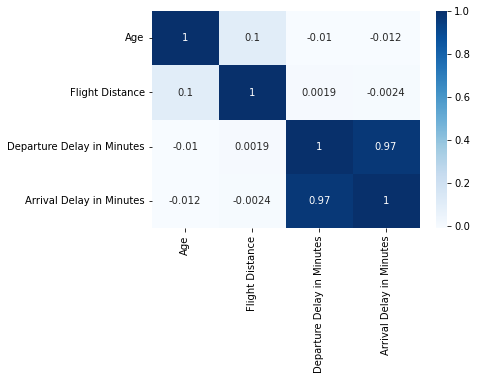

In [182]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Berdasarkan plotting heatmap diatas, delay departure memiliki korelasi yang kuat dengan delay arrival. Hal ini karena secara logika jika keberangkatan penerbangan mengalami delay maka akan berpengaruh juga pada sampai nya penerbangan pada tujuan

Untuk memeriksa kolom apa saja yang mempengaruhi tingkat kepuasan pelanggan maskapai A dan sebarapa besar pengaruh nya, dapat dilakukan visualisasi setiap feature terhadap kolom satisfaction

### Gender

In [186]:
# Perbandingan gender pada data
df['Gender'].value_counts(normalize=True)

Female    0.50752
Male      0.49248
Name: Gender, dtype: float64

Berdasarkan hasil value counts, perbandingan gender wanita dengan pria hampir sama yaitu sebesar 50:49

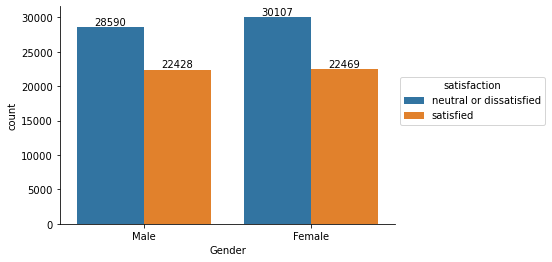

In [185]:
# Plotting tingkat kepuasan pelanggan sesuai dengan gender
ax=sns.countplot(data=df,x='Gender',hue='satisfaction')
for cont in ax.containers:
    ax.bar_label(cont)
sns.despine(top=True,right=True)
plt.legend(bbox_to_anchor=(1,.7),title='satisfaction')
plt.show()

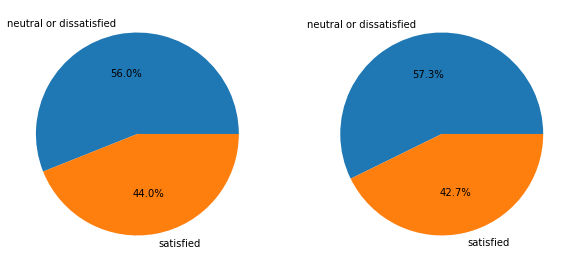

In [120]:
# Plotting persentase tingkat kepuasan pelanggan sesuai dengan gender
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Gender']=='Male']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Gender']=='Female']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
plt.show()

Dari gambaran plot diatas, dapat dilihat tingkat kepuasan pelanggan berdasarkan gender nya lebih besar pada 'neutral or dissatisfied' baik pria ataupun wanita

### Customer Type

In [187]:
# Perbandingan customer type pada data
df['Customer Type'].value_counts(normalize=True)

Loyal Customer       0.817248
disloyal Customer    0.182752
Name: Customer Type, dtype: float64

Berdasarkan hasil value counts, perbandingan tipe pelanggan loyal dan disloyal yaitu sebesar 82:18

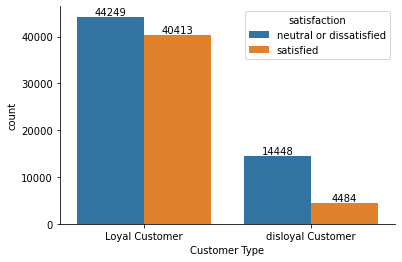

In [137]:
# Plotting tingkat kepuasan pelanggan sesuai dengan customer type
ax=sns.countplot(data=df,x='Customer Type',hue='satisfaction')
for cont in ax.containers:
    ax.bar_label(cont)
sns.despine(top=True,right=True)
plt.show()

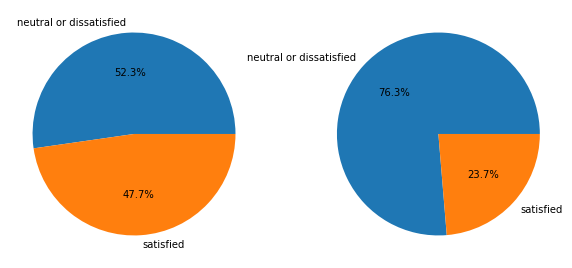

In [208]:
# Plotting persentase tingkat kepuasan pelanggan sesuai dengan customer type
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Customer Type']=='Loyal Customer']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Customer Type']=='disloyal Customer']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
plt.show()

Dari gambaran plot diatas, dapat dilihat tingkat kepuasan pelanggan loyal lebih banyak yang 'neutral or dissatisfied' sebesar 52.3% sementara untuk pelanggan disloyal jauh lebih banyak yang 'neutral or dissatisfied' sebesar 76.3%

### Age

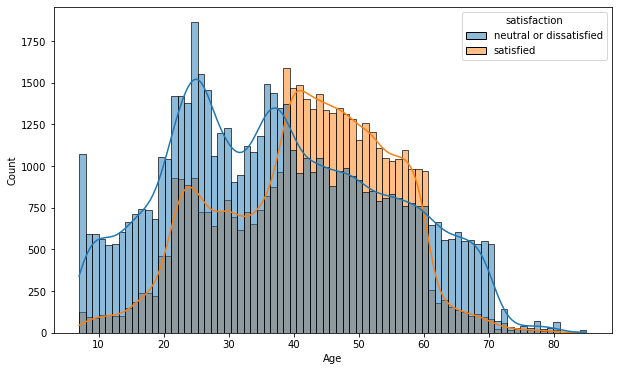

In [165]:
# Menampilkan persebaran data tingkat kepuasan pelanggan berdasarkan umur
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='satisfaction',kde=True)
plt.show()

Jika dilihat dari plot diatas, pelanggan dengan rentang umur 40 hingga 60 lebih banyak yang memberi nilai puas. <br><br>
Jenis data berdasarkan umur terlalu banyak, maka dapat dilakukan pengelompokan data berdasarkan umur menggunakan fungsi sebagai berikut

In [279]:
# Deklarasi fungsi pengelompokkan umur menjadi 0-29,30-59,>60
def group(x): 
    if x<30: 
        return "0-29"
    elif (x>=30)&(x<60): 
        return "30-59"
    else:
        return ">60"


In [281]:
# Apply fungsi dengan menambahkan kolom baru
df['Age2']=df['Age'].apply(lambda x:group(x))

Kemudian dapat ditampilkan persebaran tingkat kepuasan pelanggan berdasarkan kelompok umur

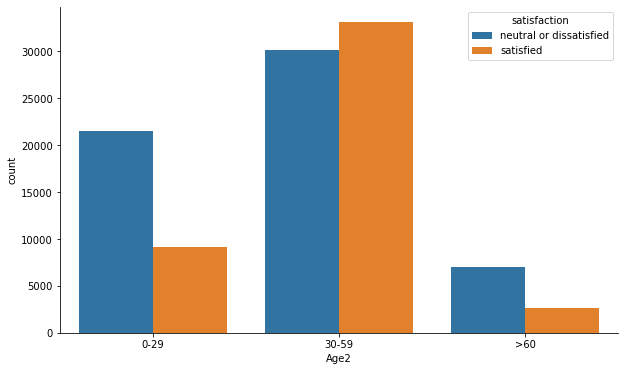

In [282]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Age2',hue='satisfaction',order=['0-29','30-59','>60'])
sns.despine(top=True,right=True)
plt.show()

Dari plot diatas dapat dilihat bahwa kebanyakan pelanggan maskapai penerbangan A ini berusia pada rentang 30 hingga 59

Kemudian dapat dilihat persentase tingkat kepuasan pelanggan berdasarkan kelompok umur sebagai berikut

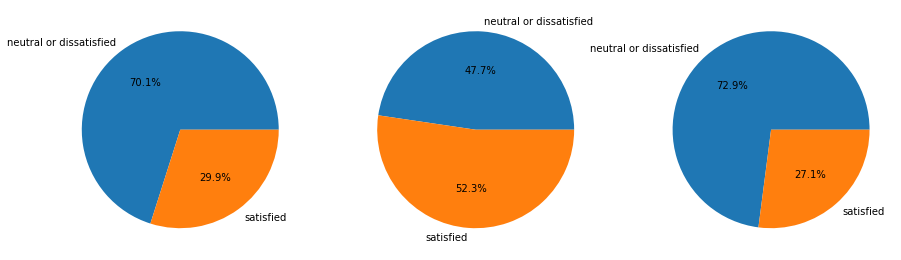

In [218]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Age2']=='0-29']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Age2']=='30-59']['satisfaction'].value_counts().sort_values(),labels=lb,autopct='%1.1f%%')
ax3.pie(df[df['Age2']=='>60']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
plt.show()

Berdasarkan plot diatas, untuk kelompok umur 0-29 dan >60 masih banyak yang 'neutral or dissatisfied' sebanyak 70.1% dan 72.9%. Sementara untuk kelompok umur 30-59 hampir tersebar rata

### Type of Travel

In [223]:
# Perbandingan Type of Travel pada data
df['Type of Travel'].value_counts(normalize=True)

Business travel    0.689857
Personal Travel    0.310143
Name: Type of Travel, dtype: float64

Value counts diatas menunjukan bahwa lebih banyak pelanggan bisnis yang menggunakan jasa penerbangan maskapai A ini

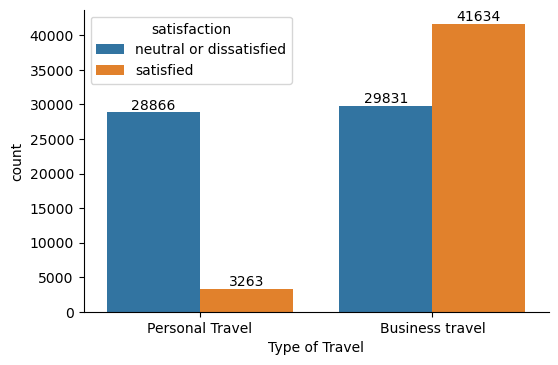

In [214]:
# Plotting tingkat kepuasan pelanggan sesuai dengan type of travel
plt.figure(dpi=100)
ax=sns.countplot(data=df,x='Type of Travel',hue='satisfaction')
for cont in ax.containers:
    ax.bar_label(cont)
sns.despine(top=True,right=True)
plt.show()

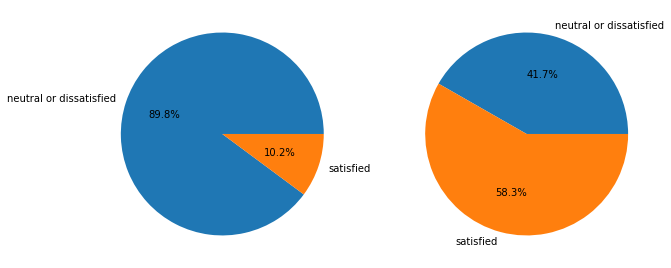

In [220]:
# Plotting persentase tingkat kepuasan pelanggan sesuai dengan type of travel
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Type of Travel']=='Personal Travel']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Type of Travel']=='Business travel']['satisfaction'].value_counts().sort_values(),labels=lb,autopct='%1.1f%%')
plt.show()

Berdasarkan plot diatas, dapat dilihat bahwa untuk pelanggan personal dominan 'neutral or dissatisfied' sebesar 89.8%. Sementara untuk pelanggan bisnis dominan nya satisfied sebesar 58.3%

### Class

In [222]:
# Perbandingan Class pada data
df['Class'].value_counts(normalize=True)

Business    0.478145
Eco         0.449765
Eco Plus    0.072089
Name: Class, dtype: float64

Hasil value counts di atas menunjukkan bahwa kelas bisnis dan eco hampir sama banyak nya sementara untuk kelas eco plus sangat sedikit

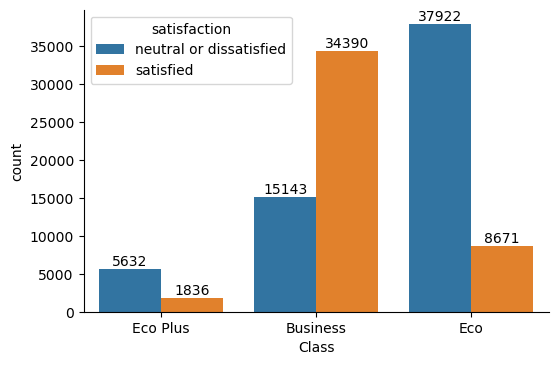

In [224]:
# Plotting tingkat kepuasan pelanggan berdasarkan kelas penerbangan
plt.figure(dpi=100)
ax=sns.countplot(data=df,x='Class',hue='satisfaction')
for cont in ax.containers:
    ax.bar_label(cont)
sns.despine(top=True,right=True)
plt.show()

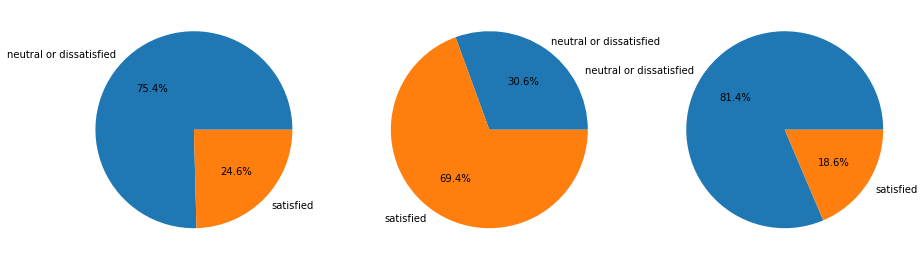

In [226]:
# Plotting persentase tingkat kepuasan pelanggan sesuai dengan kelas penerbangan
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Class']=='Eco Plus']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Class']=='Business']['satisfaction'].value_counts().sort_values(),labels=lb,autopct='%1.1f%%')
ax3.pie(df[df['Class']=='Eco']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
plt.show()

Berdasarkan plot persentase diatas, untuk kelas eco dan eco plus masih dominan pelanggan yang menilai netral atau tidak puas. Sementara untuk kelas bisnis dominan pelanggan menilai puas

### Flight Distance

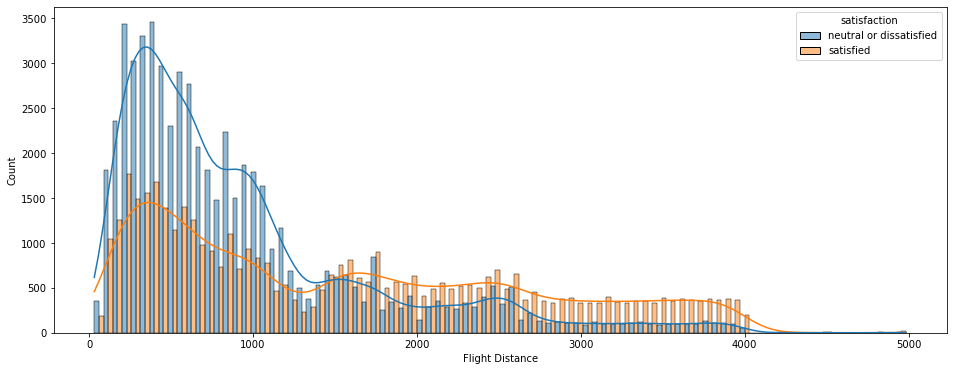

In [229]:
# Menampilkan persebaran data tingkat kepuasan pelanggan berdasarkan jarak penerbangan
plt.figure(figsize=(16,6))
sns.histplot(data=df,x='Flight Distance',hue='satisfaction',kde=True,multiple='dodge')
plt.show()

Jika kita perhatikan garis tren pada plot diatas, pada jarak penerbangan sekitar dibawah 1500 km, lebih banyak pelanggan yang menilai netral atau tidak puas. Sementara untuk jarak penerbangan diatas 1500 km, lebih banyak pelanggan yang menilai puas. Hal tersebut dapat dilihat nilai pastinya membagi data menjadi 2 kelompok dengan cara sebagai berikut

In [230]:
# Deklarasi fungsi dan menjalankan fungsi
def jarak(x): 
    if x<1500: 
        return "<1500"
    else:
        return ">1500"

df["Flight Distance 2"]=df["Flight Distance"].apply(lambda x: jarak(x))


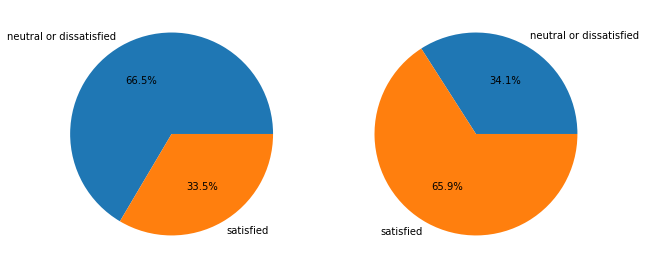

In [233]:
# Plotting persentase tingkat kepuasan pelanggan sesuai dengan kelompok jarak penerbangan
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Flight Distance 2']=='<1500']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Flight Distance 2']=='>1500']['satisfaction'].value_counts().sort_values(),labels=lb,autopct='%1.1f%%')

plt.show()

Terbukti bahwa penerbangan dengan jarak dibawah 1500 km 66.5% menilai netral atau tidak puas dan penerbangan dengan jarak diatas 1500 km menilai puas

### Inflight WIFI, Departure/Arrival Time Convenient, Ease of Online Booking, Gate Location, Food & Drink, Online Boarding, Seat Comfort, Inflight Entertainment, On-Board Service, Leg Room Service, Baggage Handling, Check-In Service, Inflight Service, Cleanliness

Untuk 14 feature selanjutnya memiliki bentuk data yang sama yaitu berisi penilaian subjektif dari pelanggan dalam menggunakan masing-masing feature. Untuk nilai 0 berarti pelanggan tidak memberi nilai yang dapat disebabkan beberapa hal seperti layanan (feature) tersebut tidak digunakan oleh pelanggan. Sementara nilai 1 menandakan nilai paling rendah dan nilai 5 menandakan nilai paling tinggi.

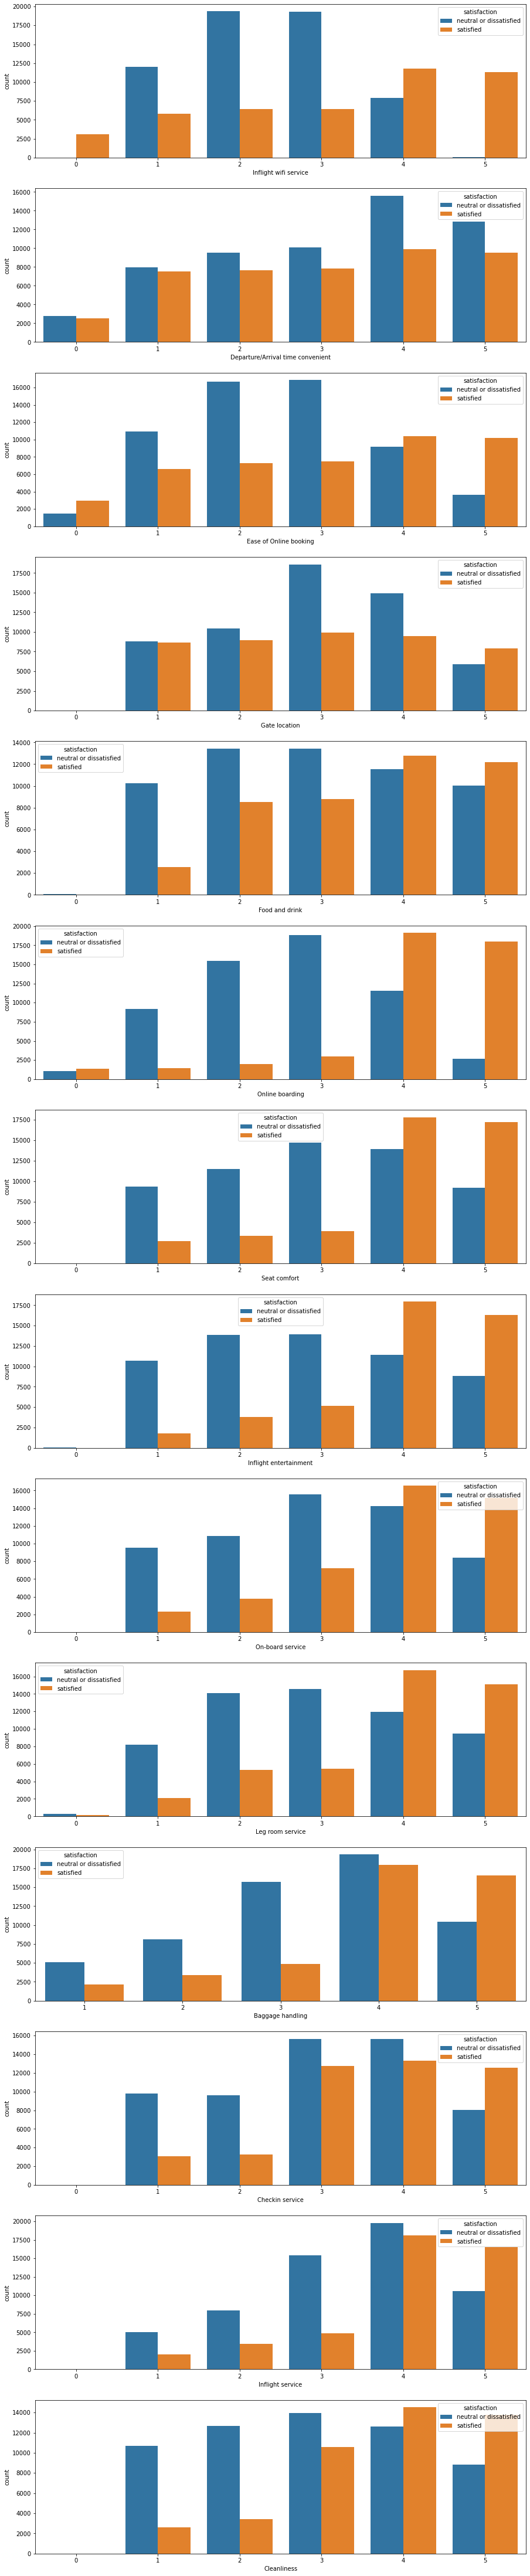

In [249]:
fig,ax=plt.subplots(14,1,figsize=(15,80))
k=0
for col in df.columns[6:20]:
    sns.countplot(data=df,x=col,hue='satisfaction',ax=ax[k])
    k+=1

In [253]:
# Menampilkan korelasi 14 kolom dengan tingkat kepuasan keseluruhan
dfc=pd.read_csv('airline passanger satisfaction.csv')
dfc['satisfaction0']=df['satisfaction'].apply(lambda x : 1 if x=='satisfied' else 0)
dfc=dfc.drop(['Unnamed: 0','id','Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)
dfc.corr(method='spearman')

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction0
Inflight wifi service,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,0.284163
Departure/Arrival time convenient,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.051718
Ease of Online booking,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,0.171507
Gate location,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.000449
Food and drink,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,0.209659
Online boarding,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,0.503447
Seat comfort,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,0.349112
Inflight entertainment,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,0.398203
On-board service,0.121500,0.068882,0.038833,-0.028373,0.059073,0.155443,0.131971,0.420153,1.000000,0.355495,0.519134,0.243914,0.550782,0.123220,0.322450
Leg room service,0.160473,0.012441,0.107601,-0.005873,0.032498,0.123950,0.105559,0.299692,0.355495,1.000000,0.369544,0.153137,0.368656,0.096370,0.313182


Berdasarkan tabel korelasi diatas, dapat dilihat bahwa fitur inflight wifi, ease of online booking, food & drink, online boarding, seat comfort, inflight entertainment, on-board service, leg room service, baggage handling, checkin service, inflight service, dan cleanliness mempengaruhi tingkat kepuasan pelanggan secara positif.

### Departure Delay in Minutes & Arrival Delay in Minutes

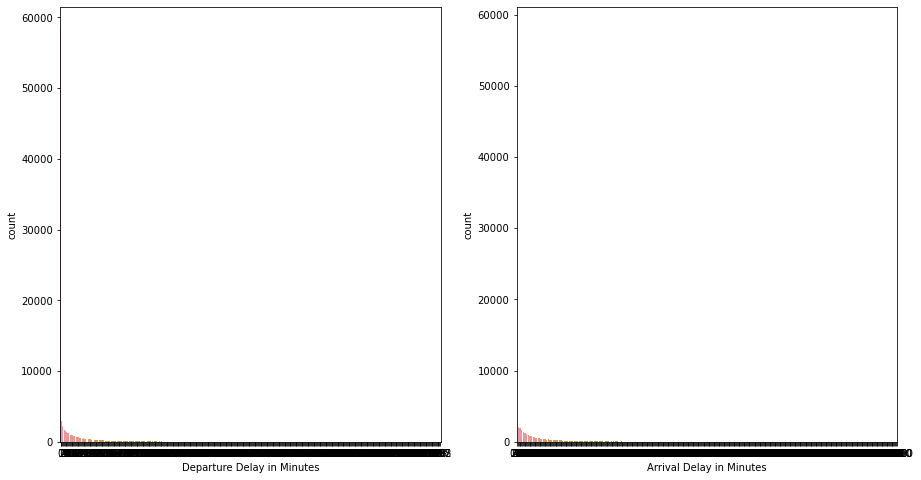

In [265]:
# Menampilkan distribusi kolom delay in minutes
fig,ax=plt.subplots(1,2,figsize=(15,8))
k=0
for col in df.columns[20:22]:
    sns.countplot(data=df,x=col,ax=ax[k])
    k+=1

berdasarkan tampilan distribusi diatas, akan susah untuk menganalisa data yang ada. Untuk mempermudah, data dapat diubah dari menit menjadi jam dan dikelompokan sebagai berikut

In [272]:
# Fungsi pengelompokkan data
def delay(x):
    if x==0:
        return 'on time'
    elif (x>0)&(x<=60):
        return '<1 hour'
    elif (x>60)&(x<=720):
        return '1 to 12 hours'
    else:
        return '>12 hours'

# Menjalankan fungsi pada kolom baru
df['Departure Delay (hr)']=df['Departure Delay in Minutes'].apply(lambda x:delay(x))
df['Arrival Delay (hr)']=df['Arrival Delay in Minutes'].apply(lambda x:delay(x))

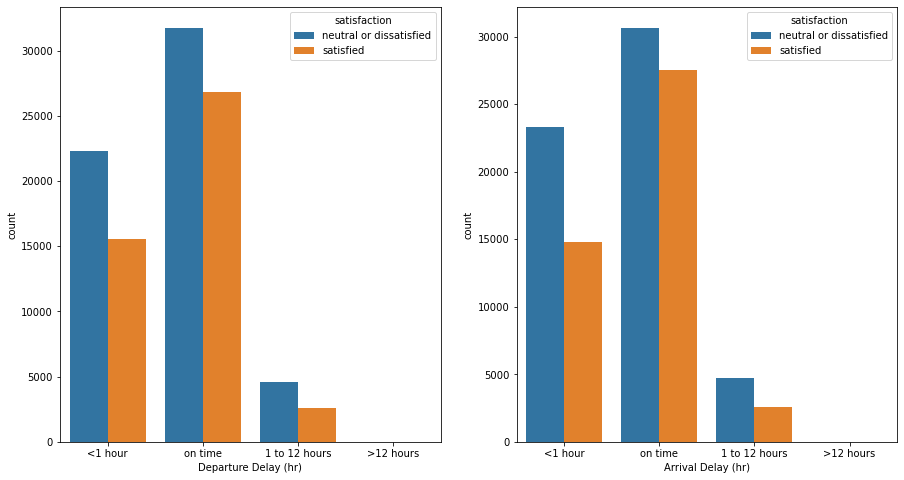

In [275]:
# Menampilkan distribusi kepuasan pelanggan berdasarkan kolom delay dalam jam
fig,ax=plt.subplots(1,2,figsize=(15,8))
k=0
for col in df.columns[25:27]:
    sns.countplot(data=df,x=col,hue='satisfaction',ax=ax[k])
    k+=1

Berdasarkan grafik diatas, pelanggan paling banyak yaitu yang tidak delay atau on time. Pelanggan yang memiliki delay berapapun baik kedatangan atau keberangkatan, menilai netral atau tidak puas lebih banyak daripada yang menilai puas. 

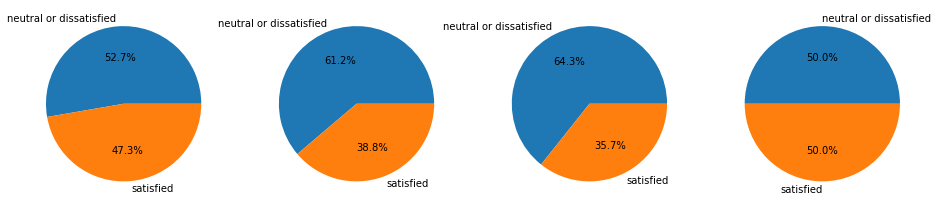

In [286]:
# Plotting persentase tingkat kepuasan pelanggan sesuai dengan delay keberangkatan dalam jam
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Arrival Delay (hr)']=='on time']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Arrival Delay (hr)']=='<1 hour']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax3.pie(df[df['Arrival Delay (hr)']=='1 to 12 hours']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax4.pie(df[df['Arrival Delay (hr)']=='>12 hours']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
plt.show()

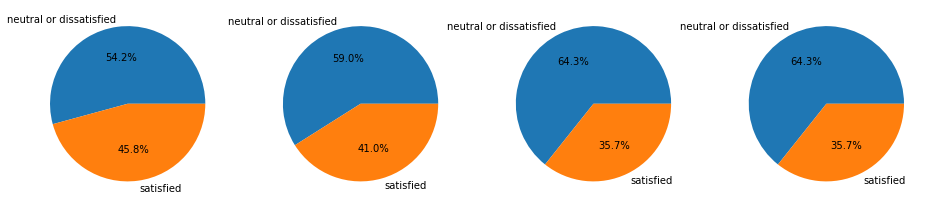

In [287]:
# Plotting persentase tingkat kepuasan pelanggan sesuai dengan delay kedatangan dalam jam
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,10))
lb=['neutral or dissatisfied','satisfied']

ax1.pie(df[df['Departure Delay (hr)']=='on time']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax2.pie(df[df['Departure Delay (hr)']=='<1 hour']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax3.pie(df[df['Departure Delay (hr)']=='1 to 12 hours']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
ax4.pie(df[df['Departure Delay (hr)']=='>12 hours']['satisfaction'].value_counts(),labels=lb,autopct='%1.1f%%')
plt.show()

Berdasarkan plotting persentase kepuasan pelanggan terhadap delay keberangkatan dan kedatangan diatas, pelanggan dengan delay yang lebih lama lebih cenderung untuk menilai netral atau tidak puas

# **Kesimpulan**

Dari analisis data tingkat kepuasan pelanggan maskapai penerbangan A yang telah dilakukan dapat diambil kesimpulan :
1. Jumlah pelanggan yang berjenis kelamin pria dan wanita hampir setara
2. Sebagian besar dari data pelanggan merupakan pelanggan setia
3. Sebagian besar pelanggan yang menggunakan jasa penerbangan ini berada pada rentang umur 30 hingga 59
4. Jasa pelayanan saat ini sangat memuaskan bagi pelanggan yang terbang dengan tujuan bisnis dan sangat tidak memuaskan bagi penerbang personal
5. Penerbangan kelas bisnis memiliki tingkat kepuasan paling tinggi dibandingkan kelas eco dan eco plus
6. Pelanggan yang jarak terbang nya lebih dari 1500 km lebih cenderung puas terhadap layanan penerbangan
7. Terdapat korelasi yang tinggi pada delay keberangkatan dan delay kedatangan yang dimana hal tersebut sesuai logika
8. Semakin lama delay keberangkatan ataupun kedatangan, pelanggan semakin cenderung untuk menilai netral atau tidak puas



# **Saran**

1. Jika perusahaan ingin menarik pelanggan baru, maka perlu dilakukan perubahan strategi jasa pelayanan pelanggan. Namun jika perusahaan ingin fokus pada pelanggan setia, maka strategi jasa layanan saat ini perlu dipertahankan dan ditingkatkan lagi
2. Jika ingin meningkatkan kepuasan terhadap penerbang personal maka perlu dirubah aspek tertentu pada jasa pelayanan penerbangan
2. Perusahaan dapat membagi fokus pelayanan penerbangan pada kelas penerbangan eco dan eco plus yang tertinggal jauh tingkat kepuasannya dibandingkan dengan kelas penerbangan bisnis
3. Kategori penilaian kepuasan pelanggan hanya dibagi dua menjadi puas dan netral atau tidak puas. Akan lebih baik untuk memisahkan kategori netral dan tidak puas karena tentu akan berpengaruh pada tindakan yang dapat dilakukan ke depannya